# Selected Operations in Easy-EO

In [1]:
import geopandas as gpd
from eeo import load_raster
from eeo.analysis import extract_value_at_coordinate
from eeo.preprocessing import (
    clip_raster_with_bbox,
    clip_raster_with_vector,
    reproject_raster,
    resample
)

### Load files

In [2]:
dem_path = r"./data/dem.tiff"
raster_path = r"./data/L2A_B02_(Raw).tiff"
roi_path = r"./data/roi.gpkg"

dem = load_raster(dem_path)
ds = load_raster(raster_path)
roi = gpd.read_file(roi_path)

## Clipping a raster file
The clipping can be done with the `gpd.GeoDataframe()` object or *the raw path to the geopandas supported vector file*

### Clipping with the GeoDataframe object

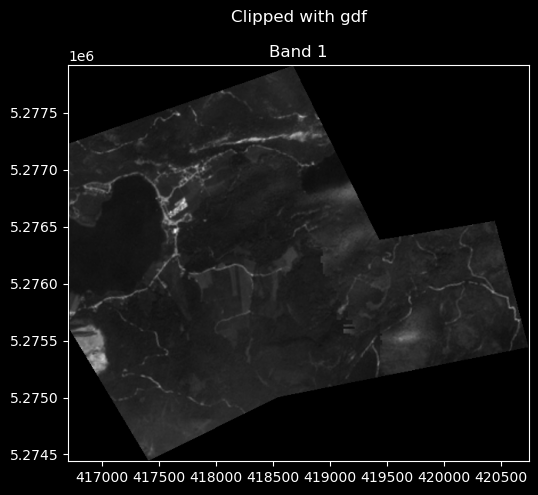

In [3]:
clipped = clip_raster_with_vector(ds, roi) # ds.clip_raster_with_vector(roi) is also valid
clipped.plot_raster(title="Clipped with gdf")

### Clipping with the path to a valid geopandas supported vector file

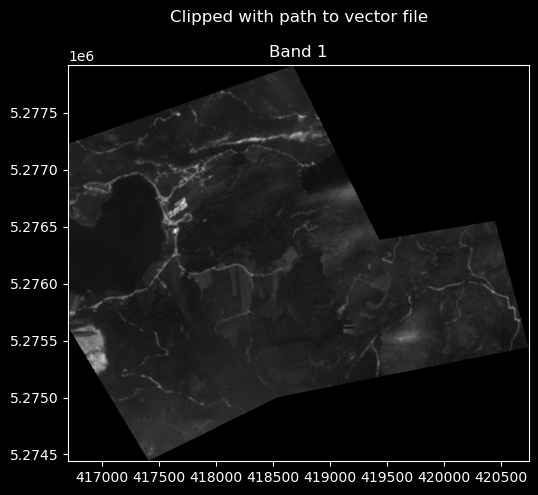

In [4]:
clipped = clip_raster_with_vector(ds, roi_path) # ds.clip_raster_with_vector(roi_path) is also valid
clipped.plot_raster(title="Clipped with path to vector file")

### Clipping with a bounding box

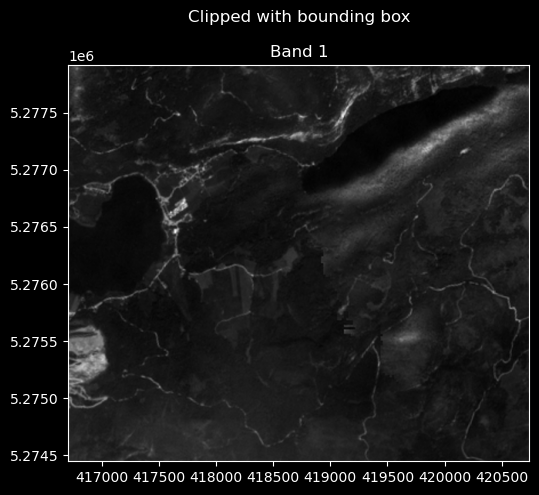

In [5]:
bbox = (
    416709.19946728,   # minx
    5274443.43066593,  # miny
    420743.09355103,  # maxx
    5277911.30403833, # maxy
)

clipped = clip_raster_with_bbox(ds, bbox) # ds.clip_raster_with_bbox(bbox) is also valid
clipped.plot_raster(title="Clipped with bounding box")

## Reproject raster

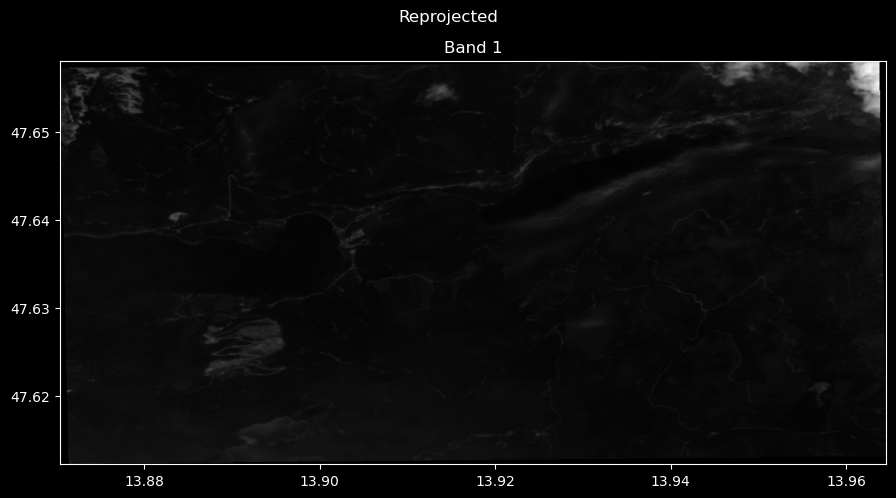

In [6]:
reprojected = reproject_raster(ds, target_crs="4326", resampling_method="bilinear") # ds.reproject_raster(target_crs="4326", resampling_method="bilinear") is also valid
reprojected.plot_raster(title="Reprojected")

## Resample
Resampling can be done by 3 methods: `scale_factor`, `resolution` (x, y), and `size` (x, y)

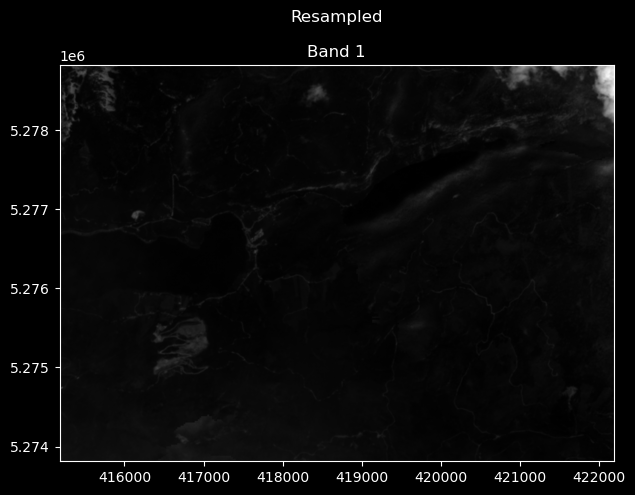

In [7]:
resampled = resample(ds, scale_factor=2, resampling_method="bilinear") # ds.reproject_raster(scale_factor=2, resampling_method="bilinear") is also valid
resampled.plot_raster(title="Resampled")

## Statistical pixel locations
By default, positions for these methods are returned in spatial coordinates (CRS-aware). 
You may instead request pixel coordinates by setting `return_position_as_pixel_coordinate=True`

In [8]:
max_pixel = dem.get_maximum_pixel()
print("Max Pixel", max_pixel)

min_pixel = dem.get_minimum_pixel(return_position_as_pixel_coordinate=True) # This returns pixel coordinates rather
print("Min Pixel", min_pixel)

mean_pixel = dem.get_mean_pixel() # The pixel closest to the mean by absolute difference
print("Mean Pixel", mean_pixel)

perc_pixel = dem.get_percentile_pixel(percentile=95)
print("Perc Pixel", perc_pixel)

Max Pixel {'value': 7556.87109375, 'position': (75.3195191, 38.59892343023758)}
Min Pixel {'value': 435.7459716796875, 'position': (2, 892)}
Mean Pixel {'value': 2014.5648193359375, 'position': (75.9120996336, 39.96527397451404)}
Perc Pixel {'value': 4075.132727050781, 'position': (79.1303684984, 41.695984663930886)}


## Extract value at a particular coordinate

In [9]:
val = extract_value_at_coordinate(dem, coordinates=(75.320, 38.599))
print(val)

7272.3726


## Close datasets

In [10]:
clipped.close()
dem.close()
ds.close()
# resampled.close() # This should already be closed due to the terminal function at the end of its chain
# reprojected.close() # This should already be closed due to the terminal function at the end of its chain